In [1]:
%matplotlib inline
import numpy as np
import keras
from functools import reduce

import matplotlib.pyplot as plt

from keras.models         import Sequential

from keras.layers         import Dense
from keras.layers         import Convolution2D
from keras.layers         import AveragePooling2D
from keras.layers         import UpSampling2D
from keras.layers         import Reshape
from keras.layers         import Flatten
from keras.optimizers     import Adam
from keras.utils.np_utils import to_categorical

path_to_fashion_mnist = '../../datasets/fashion-mnist/'

import sys
sys.path.insert(0, path_to_fashion_mnist)
from utils import mnist_reader

Using TensorFlow backend.


In [2]:
encoding_size = 2
batch_size    = 64

In [3]:
X_train, y_train = mnist_reader.load_mnist(path_to_fashion_mnist + 'data/fashion', kind = 'train')
X_train          = X_train.reshape(-1, 28, 28, 1)
X_train          = (X_train - X_train.mean()) / X_train.std()

In [4]:
X_shoes = X_train[reduce(np.logical_or, (y_train == 5, y_train == 7, y_train == 9))]
X_shoes.shape

(18000, 28, 28, 1)

In [5]:
encoder = Sequential([
    Convolution2D(32, 3, padding = 'same', input_shape = (28, 28, 1), activation = 'relu'),
    Convolution2D(32, 3, padding = 'same', activation = 'relu'),
    AveragePooling2D(),
    Convolution2D(64, 3, padding = 'same', activation = 'relu'),
    Convolution2D(64, 3, padding = 'same', activation = 'relu'),    
    Flatten(),
    Dense(encoding_size, activation = 'tanh')
])

In [6]:
decoder = Sequential([
    Dense(49, input_shape = (encoding_size,), activation = 'relu'),
    Reshape((7, 7, 1)),
    Convolution2D(128, 3, padding = 'same', activation = 'relu'),
    UpSampling2D(),
    Convolution2D(64, 3, padding = 'same', activation = 'relu'),
    UpSampling2D(),
    Convolution2D(32, 3, padding = 'same', activation = 'relu'),
    Convolution2D(1, 3, padding = 'same', activation = 'tanh')
])

In [7]:
autoencoder = Sequential([
    encoder,
    decoder
])
autoencoder.compile(Adam(1e-4), loss = 'mse')

In [8]:
fit_params = {
    'x'         : X_shoes,
    'y'         : X_shoes,
    'batch_size': batch_size,
    'epochs'    : 30
}

In [9]:
autoencoder.fit(**fit_params)

Epoch 1/30
18000/18000 [==============================] - 25s - loss: 0.5113    
Epoch 2/30
18000/18000 [==============================] - 24s - loss: 0.2992    
Epoch 3/30
18000/18000 [==============================] - 24s - loss: 0.2718    
Epoch 4/30
18000/18000 [==============================] - 24s - loss: 0.2606    
Epoch 5/30
18000/18000 [==============================] - 25s - loss: 0.2542    
Epoch 6/30
18000/18000 [==============================] - 24s - loss: 0.2504    
Epoch 7/30
18000/18000 [==============================] - 24s - loss: 0.2475    
Epoch 8/30
18000/18000 [==============================] - 24s - loss: 0.2449    
Epoch 9/30
18000/18000 [==============================] - 24s - loss: 0.2430    
Epoch 10/30
18000/18000 [==============================] - 24s - loss: 0.2414    
Epoch 11/30
18000/18000 [==============================] - 24s - loss: 0.2398    
Epoch 12/30
18000/18000 [==============================] - 24s - loss: 0.2386    
Epoch 13/30
18000/18000 [

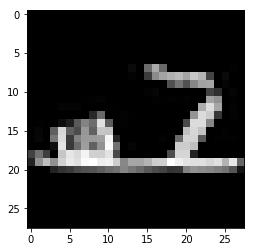

In [10]:
img = X_shoes[18]
plt.imshow(img.squeeze(), cmap = 'gray')

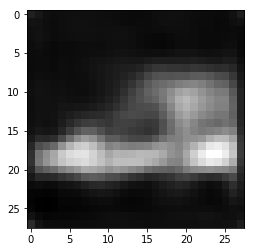

In [11]:
img_ = autoencoder.predict(np.expand_dims(img, 0))
plt.imshow(img_.squeeze(), cmap = 'gray')